# Predicting H1N1 Flu Vaccination Status: A Machine Learning Approach

## Overview

In this project, we want to use data from the National Flu Survey (NHFS 2009) to predict whether or not respondents got the H1N1 vaccine. It is important to understand past vaccination patterns in order to understand those of more recent pandemics, such as COVID-19. The most influential factors determining vaccination status are Doctor Recommendation of H1N1 vaccine, Health Insurance, opinion of H1N1 Vaccine effectiveness, opinion of H1N1 risk.
We used six machine learning models to make the predictions. We used Decision Tree Classifier, Logistic Regression, Random Forest, K-Nearest Neighborhood Classifier, Gradient Boosting Classifier, and XG Boosting Classifier. The Gradient Boosting Classifier yielded the best accuracy and precision score.


## Business Problem

Vaccination, as one of the most successful public health interventions to ever be implemented, led to the elimination and control of diseases that were once common throughout the world. Despite overwhelming medical evidence and the unanimous position of medical professionals in favor of vaccination, the number of people skeptical about vaccination has grown in many countries in recent years. The consequence of this alarming trend is a decline in immunization coverage. Several outbreaks of infectious diseases have been linked to undervaccinated communities. The problem of expanding vaccine rejection has begun to be so widespread that it became the subject of many studies aimed at understanding the sources and correlations of attitudes toward vaccination.

The aim of this study is to predict how likely individuals are to receive their H1N1 flu vaccine. We believe the prediction outputs (model and analysis) of this study will give public health professionals and policy makers, as an end user, a clear understanding of factors associated with low vaccination rates. This in turn, enables end users to systematically act on those features hindering people to get vaccinated. 

The methodologies used in these models can be used as a reference for future work, and also can be compared with different models for performance evaluation. In cognizant of the data type we have, and our objectives, multiple machine learning classification models, such as Logistic regression, Decision tree, Random forest, kNN, Gradient Boosting, and XGBoosting are implemented. 

So as to classify exactly those who got H1N1 flu shot from those that did not, we need a higher accuracy of the model outputs, as well as a high precision score, which is related to a low false positive rate(those who considered vaccinated but did actually not get h1n1 flu shot). This will be further assessed using the ROC curve, accuracy score, precision score, and confusion matrix.

## Summary of Business Understanding

**End Users**: Public health officials of the American Public Health Association (APHA)

**True business problem**:
- Predicting who is vaccinated or not accurately? (Deliverable: Model)
- What are the factors that influence people get H1N1 vaccine or not?  (Deliverable: Analysis)


**Context**:
- False negative: Saying people did not get the vaccine when they actually did. 
- Outcome: Not a big problem

- False positive: Saying people got the vaccine when they actually did not. 
- Outcome: Big problem

**Evaluation**:
We will focus on accuracy, f1, and precision scores for our model iterations in order to minimize False Positives, because in our business context false positives are a much more costly mistake than false negatives.

- **Accuracy**
- **Precision**
- Recall
- **F1-Score**



In [23]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost     # extreme gradient boosting

# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

The following evaluate function is copied from (https://github.com/lindseyberlin/Cat-in-the-Dat-Project/blob/main/notebooks/Lindsey/EDA-Initial-Models.ipynb). 

We will use this function to evaluate the performance of our models:

In [24]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, roc_auc='skip'):
    '''
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set
    
    roc_auc allows you to set how to calculate the roc_auc score: 
    'dec' for decision_function or 'proba' for predict_proba 
    If roc_auc == 'skip', then it ignores calculating the roc_auc_score
    
    Inputs:
        estimator: a fit sklearn-style model or pipeline
        X_tr: array or pandas dataframe
            training input variables
        X_te: array or pandas dataframe
            testing input variables
        y_tr: array or pandas series
            training output variable
        y_te: array or pandas series
            testing output variable
        roc_auc: str
            'skip': default, skips calculating roc_auc
            'dec': use decision_function to calculate roc_auc
            'proba': use predict_proba to calculate roc_auc
    '''
    # Grab predictions
    tr_preds = estimator.predict(X_tr)
    te_preds = estimator.predict(X_te)
    
    # output needed for roc_auc_score
    if roc_auc == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec': 
        train_out = estimator.decision_function(X_tr)
        test_out = estimator.decision_function(X_te)
    elif roc_auc == 'proba': 
        train_out = estimator.predict_proba(X_tr)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_te)[:, 1]
    else:
        raise Exception("The value for roc_auc should be 'skip', 'dec' or 'proba'")    
    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train Precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train Recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train F1-Score: {f1_score(y_tr, tr_preds)}")
    if type(train_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
        
    print("*" * 10)
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test Precision: {precision_score(y_te, te_preds)}")
    print(f"Test Recall: {recall_score(y_te, te_preds)}")
    print(f"Test F1-Score: {f1_score(y_te, te_preds)}")
    if type(test_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")    
    
    # Plot confusion matrix for test set
    plot_confusion_matrix(estimator, X_te, y_te, cmap="plasma", normalize='true')

## Data Understanding

This data comes from a NHFS National Flu Survey from 2009, which inquires about whether or not people received the seasonal flu and/or the H1N1 flu vaccination, as well as their demographic, behavioral, and health factors. There are 26,000 respondents to this survey. In this project we chose H1N1 vaccination rate as our target variable. We used all features in the survey, and filled missing values using the Iterative Imputer. 

In [25]:
!ls Data

LabelsandFeatures.txt     training_set_features.csv
test_set_features.csv     training_set_labels.csv


In [26]:
# Reading in the feature data
data1 = pd.read_csv('Data/training_set_features.csv')
data1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [27]:
# Reading in the target data
data2 = pd.read_csv('Data/training_set_labels.csv')
data2.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [28]:
# Exploring the percentage breakdown of the two classes in one possible target (seasonal flu rate)
data2['seasonal_vaccine'].value_counts(normalize=True) 

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [29]:
# Exploring the percentage breakdown of the two classes in one possible target (H1N1 flu rate)
data2['h1n1_vaccine'].value_counts(normalize=True)   # class imbalance problem

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [30]:
# Merging feature and target data
df = data1.merge(data2, how='left', on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [31]:
# Getting info about null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [32]:
# Getting number of null values
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [33]:
# Explore numerical columns
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [34]:
# Explore object columns
df[[c for c in df.columns if df[c].dtype =='object']].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


We decided to choose the H1N1 vaccination rate as our target variable, because so many of the features are related to H1N1 vaccination. This target has a class imbalance problem which we want to deal with in this project.

## EDA

The following visualizations represent the top four most influential features in determining vaccination status for H1N1. There are more exploratory visualizations in the notebooks in the notebook folder.

In [35]:
# Making a copy of main dataframe to use for visualizations
df2 = df.copy()

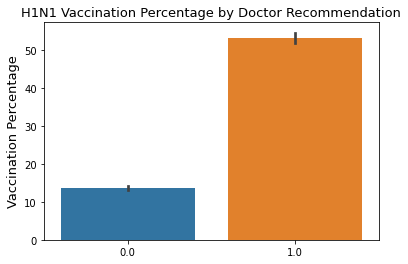

In [36]:
# Graph for relationship between H1N1 vaccination and Doctor recommendation
dr = sns.barplot(x=df2['doctor_recc_h1n1'].dropna(), y=df2['h1n1_vaccine']*100)
dr.set_xlabel('')
dr.set_ylabel('Vaccination Percentage', fontsize=13)
dr.set_title('H1N1 Vaccination Percentage by Doctor Recommendation', fontsize=13);

In [37]:
# Creating dictionary for mapping in order to create better names for x axis in graphs below
ins_dict = {1: 'Health Insurance',
           0: 'No Health Insurance'}

In [38]:
# Creating the column that will be used to create clear x axis tick marks in graph below
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)

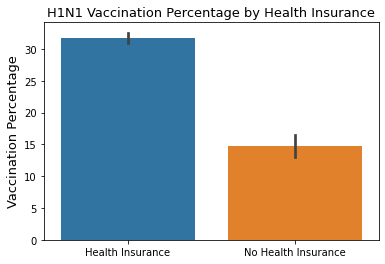

In [39]:
# Health Insurance graph
ins = sns.barplot(x=df2['health_ins_words'], y=df2['h1n1_vaccine']*100)
ins.set_xlabel('')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('H1N1 Vaccination Percentage by Health Insurance', fontsize=13);

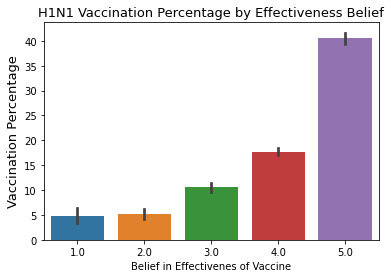

In [40]:
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
ins = sns.barplot(x=df2['opinion_h1n1_vacc_effective'].dropna(), y=df2['h1n1_vaccine']*100)
ins.set_xlabel('Belief in Effectivenes of Vaccine')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('H1N1 Vaccination Percentage by Effectiveness Belief', fontsize=13);

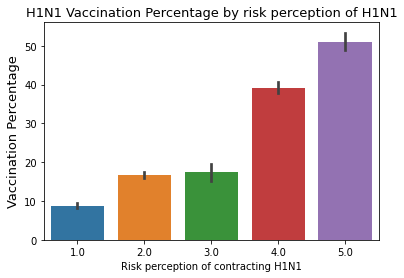

In [41]:
# Risk graph exploring vaccine percentage depending on risk perception of H1N1
ins = sns.barplot(x=df2['opinion_h1n1_risk'].dropna(), y=df2['h1n1_vaccine']*100)
ins.set_xlabel('Risk perception of contracting H1N1')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('H1N1 Vaccination Percentage by risk perception of H1N1', fontsize=13);

## Data Preparation

There were a few changes we made to the data set. First, we dropped the "respondent_id" and "seasonal_vaccine" columns because they were not relevant for our purposes. We also added columns due to categorical columns that we transformed with OneHotEncoder. We also filled null values with Iterative Imputer, which was a better alternative to simple imputer for our dataset. We replaced category names with frequency counts with CountEncoder for the columns which had more than 10 unique categories. We used pipelines to make preprocessing and modelling more efficient, and also to prevent data leakage. We also decided to split training and testing data twice so that we could have a holdout set to test our final model's generalizability at the end.

In [42]:
# Define our X and y
X = df.drop(columns = ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']

In [43]:
# Train - Holdout Set Split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [44]:
# Regular Train Test Split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

We used the stratify argument for y (our target) in both splits to help deal with the class imbalance problem.

In [45]:
# Set up lists for each columns datatypes
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [46]:
# We wanted to see each column category
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (with less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (with more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (with less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object Columns (with more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [47]:
# Preprocessing with Pipelines
num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),   # replace missing values by IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                    # Scale the numbers by MinMaxScaler
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # replace missing categories by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     # Transform each category into a new column
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), # replace category names with frequency counts by CountEncoder
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            # replace missing values by IterativeImputer
])

In [48]:
# Preprocessor defined using ColumnTransformer by packaging the all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [49]:
# Fitting preprocessor to see the components as a whole
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'in

In [50]:
# Let'see what this looks like after the preprocessor transformation
X_tr_transformed = preprocessor.transform(X_tr)
X_tr_transformed.shape

(19228, 59)

In [51]:
# Visualize it with Pandas dataframe 
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.016076,0.963804,0.038064,0.894508,0.0,1.000000,0.0,0.116478,0.141558,1.0,0.0,1.000000,0.779010,0.75,0.296807,0.75,0.75,0.279800,0.75,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.016076,0.000000,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,0.0,0.110629,0.920662,0.75,0.765602,0.25,0.75,0.759933,0.25,0.333333,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,0.0,1.000000,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.00,1.00,0.279800,0.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.25,0.75,0.279800,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,1.0,1.000000,0.920662,0.25,0.062409,0.00,0.75,0.279800,0.25,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


In each model, we will put this preprocessor into the modelling pipeline to make sure null values are filled and categorical variables are transformed.

## Modeling

We wanted to use a variety of different models so as to find the most accurate model. Because there are many different hyperparameters for each model and we did not know the optimal combinations, we used GridSearrchCV to find the best combinations for each model. We specified class weight to be balanced in order to address the class imbalance issue for our models, whenever possible. We also analyzed the accuracy score, precision score, fl score, and roc-auc curve for each model. We also compared the different roc-auc curves of each model, to choose the final model. Additionally, we looked closely at the confusion matrix to see whether or not we were minimizing false positives. Gradient Boosting Classifier gave us the best accuracy and precision scores, so we chose it to be our final model. 

### Baseline Understanding

- Let's use DummyClassifier to make prediction based on the most frequent class in the target variable, which is 0 in our case. 

In [52]:
# Setting the up the dummy model to go through the pipeline
dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))
])

In [53]:
# Fitting the dummy model
dummy_model.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                

Training Scores:
Train Accuracy: 0.7875494071146245
Train Precision: 0.0
Train Recall: 0.0
Train F1-Score: 0.0
**********
Testing Scores:
Test Accuracy: 0.7874376039933444
Test Precision: 0.0
Test Recall: 0.0
Test F1-Score: 0.0


/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


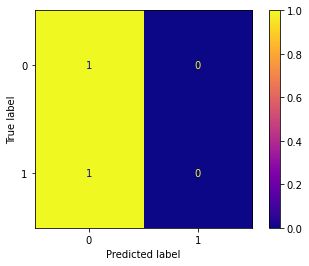

In [54]:
# Evaluate dummy model
evaluate(dummy_model, X_tr, X_te, y_tr, y_te, roc_auc='skip')

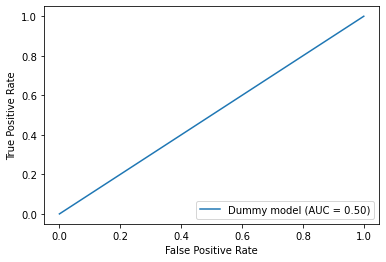

In [55]:
# Plotting the roc-auc curve for dummy model
plot_roc_curve(dummy_model, X_tr, y_tr, name='Dummy model'); 

So, the mean of the accuracy score is a little over 78% if we always guess the majority class, which is 0 in this case.

### Modeling Iterations
Now we will start to iterate over multiple models!

### MODEL 1: Decision Tree Classifier

In [56]:
# Setting up the DecisionTreeClassifier to go though the pipeline
dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', max_depth = 5))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [57]:
# fitting the model to the training data
dtc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                

Training Scores:
Train Accuracy: 0.7920220511753693
Train Precision: 0.5071858288770054
Train Recall: 0.7429620563035496
Train F1-Score: 0.6028404012315026
**********
Testing Scores:
Test Accuracy: 0.7886855241264559
Test Precision: 0.5019710906701709
Test Recall: 0.7475538160469667
Test F1-Score: 0.6006289308176102


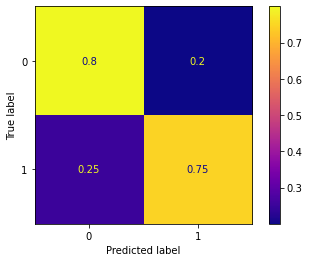

In [58]:
# Evaluating the decision tree model for various metrics
evaluate(dtc, X_tr, X_te, y_tr, y_te, roc_auc='skip')

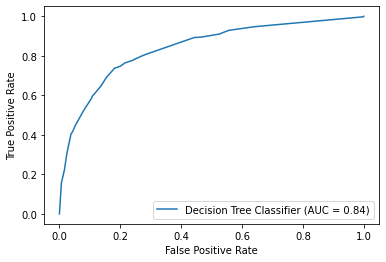

In [59]:
# roc-auc curve for decision tree model
plot_roc_curve(dtc, X_te, y_te, name='Decision Tree Classifier'); 

This decision tree model is not overfitting, but we have a low precision score, as well as a low f1 score. However, the AUC for this model is 0.84, which is fairly high, meaning that it does an adequate job of maximizing true positives and minimizing the false positives. This model is not overfitting.

### MODEL 2: Logistic Regression

In [60]:
# Setting up the logistic regression model to go through the pipeline
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, C=1, class_weight= 'balanced', solver= 'lbfgs',           
                                      random_state=42))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [61]:
# Fitting the logistic regression model on the training data
logreg.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                

Training Scores:
Train Accuracy: 0.7756396921156646
Train Precision: 0.4816946442845723
Train Recall: 0.7375764993880048
Train F1-Score: 0.5827852998065763
**********
Testing Scores:
Test Accuracy: 0.7791181364392679
Test Precision: 0.4872448979591837
Test Recall: 0.7475538160469667
Test F1-Score: 0.58996138996139


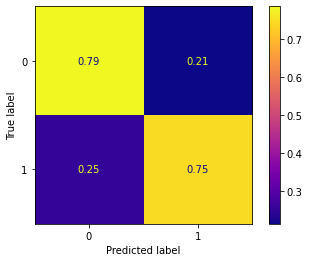

In [62]:
# Evaluating the logistic regression for various metrics
evaluate(logreg, X_tr, X_te, y_tr, y_te)

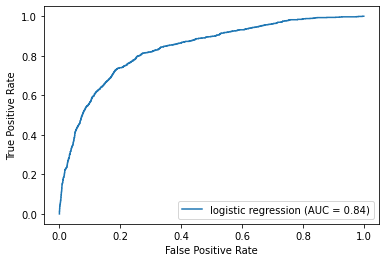

In [63]:
# Plotting the roc-auc curve for the logistic regression model
plot_roc_curve(logreg, X_te, y_te, name='logistic regression');

This logistic regression model has low precision and fl scores, and has an AUC equal to the decision tree AUC above. This model is not overfitting.

### MODEL 3: Random Forest

In [64]:
# Setting up the RandomForestClassifier to go through the pipeline
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight= 'balanced', max_depth= 5, min_samples_leaf= 1,
                                          n_estimators= 200, random_state=42))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [65]:
# Fitting the random forest model to the training data
rfc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                

Training Scores:
Train Accuracy: 0.7942583732057417
Train Precision: 0.5107303277324904
Train Recall: 0.7515299877600979
Train F1-Score: 0.608161648177496
**********
Testing Scores:
Test Accuracy: 0.788269550748752
Test Precision: 0.5013245033112583
Test Recall: 0.7407045009784736
Test F1-Score: 0.5979462875197473


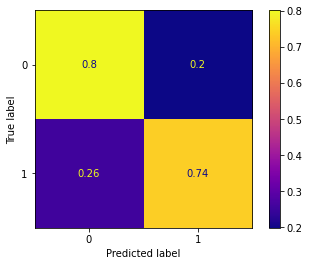

In [66]:
# Evaluating various metrics of the random forest classifier
evaluate(rfc, X_tr, X_te, y_tr, y_te)

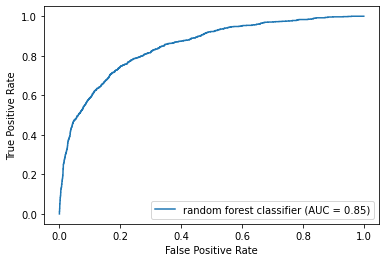

In [67]:
plot_roc_curve(rfc, X_te, y_te, name='random forest classifier');

This random forest classifier model also has low precision and fl scores. It has an AUC score of 0.85, which is slightly better than the decision tree model above. This model is not overfitting to a great extent.

### MODEL 4: kNN Classifier

In [68]:
# Setting up the KNN model to go through the pipeline
kNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5, p=1, weights= 'distance'))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [69]:
# Fitting the KNN model to the training data
kNN.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                

Training Scores:
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1-Score: 1.0
**********
Testing Scores:
Test Accuracy: 0.7999168053244592
Test Precision: 0.5622406639004149
Test Recall: 0.2651663405088063
Test F1-Score: 0.36037234042553196


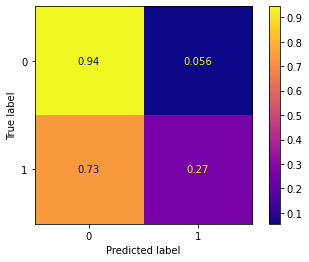

In [70]:
# evaluating the KNN model for various metrics
evaluate(kNN, X_tr, X_te, y_tr, y_te)

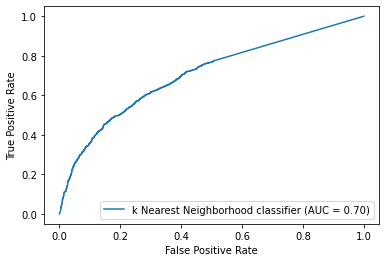

In [71]:
# Plotting the roc-auc curve for the KNN model
plot_roc_curve(kNN, X_te, y_te, name='k Nearest Neighborhood classifier');

This KNN model is definitely overfitting; the training data has perfect scores for all metrics, whereas the testing data scores are much lower. The AUC score is also much lower than on previous models.

### MODEL 5: Gradient Boosting Classifier

In [72]:
# Setting up the gradient boosting classifier to go through the pipeline
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200,
        random_state=42))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [73]:
# Fitting the gradient boosting classifier to the training data
gbc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                

Training Scores:
Train Accuracy: 0.895933014354067
Train Precision: 0.8400783289817232
Train Recall: 0.630110159118727
Train F1-Score: 0.7201007133864876
**********
Testing Scores:
Test Accuracy: 0.8548252911813644
Test Precision: 0.720108695652174
Test Recall: 0.5185909980430529
Test F1-Score: 0.602957906712173


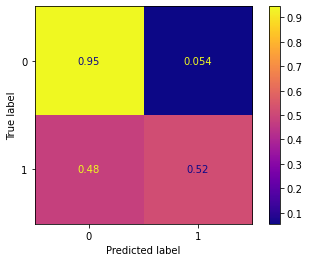

In [74]:
# Evaluate the gradient boosting model for various metrics
evaluate(gbc, X_tr, X_te, y_tr, y_te)

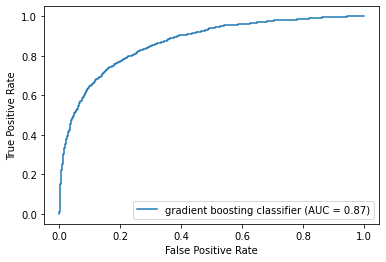

In [75]:
# Plotting the roc-auc curve for the gradient boosting model
plot_roc_curve(gbc, X_te, y_te, name='gradient boosting classifier');

This model has the highest overall scores of all the models done so far, and also does the best job of minimizing the false positives. This is our candidate for the final model.

### MODEL 6: XG Boosting Classifier

In [76]:
# Setting up the XG Boosting model to go through the pipeline
xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgboost.XGBClassifier(learning_rate= 1, max_depth= 2, n_estimators= 100, random_state=42))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [77]:
# fitting the xg boosting model to the training data
xgb.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                

Training Scores:
Train Accuracy: 0.8668088204701477
Train Precision: 0.7565656565656566
Train Recall: 0.5500611995104039
Train F1-Score: 0.6369950389794472
**********
Testing Scores:
Test Accuracy: 0.8508735440931781
Test Precision: 0.7126917712691772
Test Recall: 0.5
Test F1-Score: 0.5876940770557791


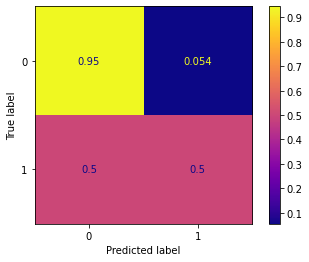

In [78]:
# Evaluating the XG Boost model for various metrics
evaluate(xgb, X_tr, X_te, y_tr, y_te)

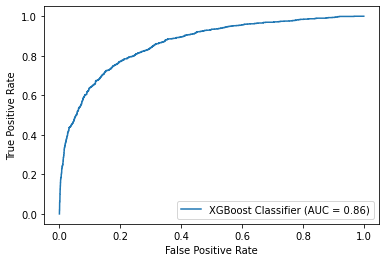

In [79]:
plot_roc_curve(xgb, X_te, y_te, name='XGBoost Classifier');

This model gave us similar scores to the gradient boosting model, but the gradient boosting model has the best AUC score and precision score. So, we will choose the gradient boosting classifier as the final model.

## Comparison of Model ROC Curves

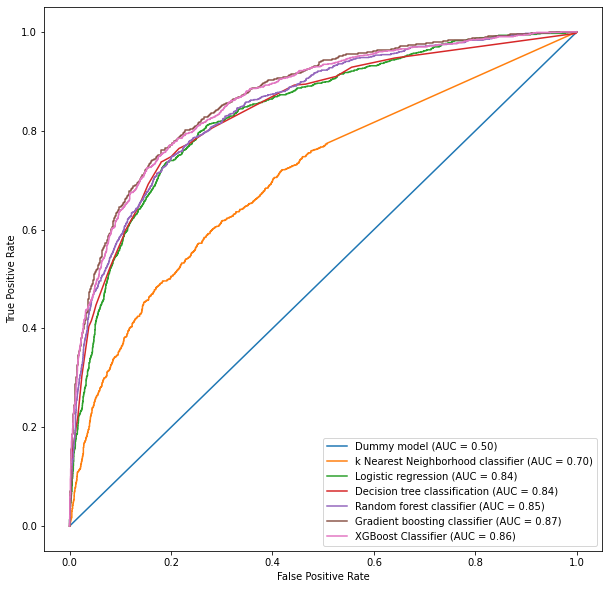

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_roc_curve(dummy_model, X_te, y_te,
               name='Dummy model', ax=ax)
plot_roc_curve(kNN, X_te, y_te, 
               name='k Nearest Neighborhood classifier', ax=ax)
plot_roc_curve(logreg, X_te, y_te, 
               name='Logistic regression', ax=ax)
plot_roc_curve(dtc, X_te, y_te,
               name='Decision tree classification', ax=ax)
plot_roc_curve(rfc, X_te, y_te, 
               name='Random forest classifier', ax=ax)
plot_roc_curve(gbc, X_te, y_te, 
               name='Gradient boosting classifier', ax=ax)
plot_roc_curve(xgb, X_te, y_te, 
               name='XGBoost Classifier', ax=ax);

### 'Final' Model: Gradient Boosting Classifier

From the ROC curves comparison above, and confusion matrix of the method, we decided to choose Gradient Boosting Classifier as our final model. 

In [59]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate =0.1, n_estimators=200, 
                                              max_depth=5,
                                              random_state=42))
])


In [60]:
output_final_model = final_model.fit(X_tr, y_tr)

Training Scores:
Train Accuracy: 0.895933014354067
Train Precision: 0.8400783289817232
Train Recall: 0.630110159118727
Train F1-Score: 0.7201007133864876
**********
Testing Scores:
Test Accuracy: 0.8476226132534631
Test Precision: 0.7051282051282052
Test Recall: 0.48500881834215165
Test F1-Score: 0.5747126436781609


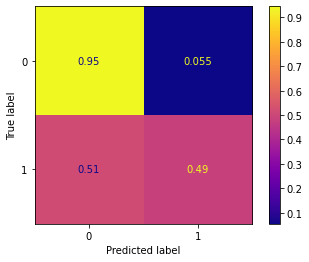

In [62]:
evaluate(final_model, X_tr, X_hold, y_tr, y_hold)

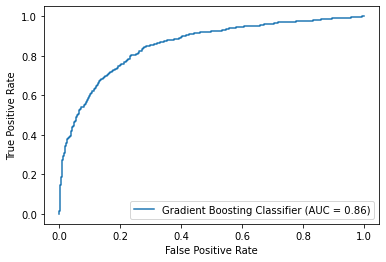

In [63]:
plot_roc_curve(final_model, X_hold, y_hold, name='Gradient Boosting Classifier');

In [112]:
# we can calculate predictions for confusion matrix
hold_preds_final_model = final_model.predict(X_hold)
cm=confusion_matrix(y_hold, hold_preds_final_model, normalize='true')

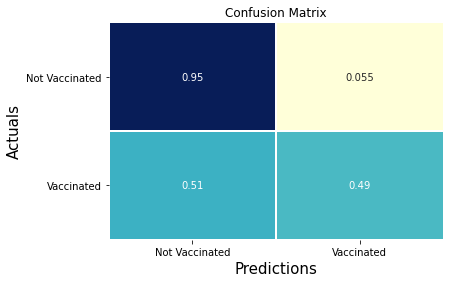

In [113]:
# Plot heatmap for final model's confusion matrix for better visualization 
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar=False, linewidths=1, cmap="YlGnBu");  

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predictions', fontsize = 15)
ax.set_ylabel('Actuals', fontsize = 15)
ax.xaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'])
ax.yaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'], rotation = 0, fontsize = 10);

 ## Evaluation
Our baseline model had an accuracy score of 78%, but a score of zero for precision, recall, and fl scores. When we compare all of our following models to this baseline, all have much better precision, recall, and f1 scores, and many have higher accuracy scores. The decision tree model is not overfitting, but it has a low precision score, as well as a low f1 score. However, it has an AUC score of 0.84, which is fairly high, meaning that it does an adequate job of maximizing true positives and minimizing the false positives. The decision tree model is not overfitting. This logistic regression model has low precision and fl scores, and has an AUC equal to the decision tree AUC above. This model is not overfitting. The random forest classifier model also has low precision and fl scores. It has an AUC score of 0.85, which is slightly better than the decision tree model above. This model is not overfitting to a great extent. The KNN model is definitely overfitting; the training data has perfect scores for all metrics, whereas the testing data scores are much lower. The AUC score is also much lower than on previous models. The Gradient Boosting model has the highest overall scores of all the models done so far, and also does the best job of minimizing the false positives. This is our candidate for the final model. The XG Boost model gave us similar scores to the gradient boosting model, but the gradient boosting model has the best AUC score and precision score. So, we will choose the gradient boosting classifier as the final model.

Our final model did not overfit to the training set, we got similar AUC, precision and accuracy scores for the holdout set. Because the model does a good job of minimizing the false positive rate on the hold out data, we are fairly confident that it will generalize well to unseen data and will accurately help public health offials determine the people who didn't get the vaccine. We are going to look into feature importances to understand the relationship between the features and vaccination behavior.

## Feature Importance

In [64]:
# Accessing the features of the preproccesor
final_model['preprocessor']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'in

In [65]:
# We are looking at the shape of the preprocessor transformation.
final_model['preprocessor'].fit_transform(X_tr).shape

(19228, 59)

In [66]:
# We are looking at the transformed data
pd.DataFrame(final_model['preprocessor'].fit_transform(X_tr)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.016076,0.963804,0.038064,0.894508,0.0,1.000000,0.0,0.116478,0.141558,1.0,0.0,1.000000,0.779010,0.75,0.296807,0.75,0.75,0.279800,0.75,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.016076,0.000000,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,0.0,0.110629,0.920662,0.75,0.765602,0.25,0.75,0.759933,0.25,0.333333,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,0.0,1.000000,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.00,1.00,0.279800,0.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.25,0.75,0.279800,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,1.0,1.000000,0.920662,0.25,0.062409,0.00,0.75,0.279800,0.25,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


In [67]:
# We are looking at the feature importances coming out of. the gradient boosting classifier
final_model['classifier'].feature_importances_

array([1.11492608e-02, 1.16198447e-02, 5.50352362e-03, 3.14729500e-03,
       5.05099935e-03, 3.02963189e-03, 2.89312301e-03, 3.00118538e-03,
       1.48503032e-03, 3.04514685e-01, 2.08734341e-02, 7.16371985e-03,
       8.33912735e-03, 3.79441735e-02, 1.63029370e-01, 1.19087364e-01,
       9.45289860e-02, 1.36968164e-02, 1.29758084e-02, 3.14383678e-02,
       1.11118335e-02, 8.91720376e-03, 7.43287360e-03, 2.67321629e-03,
       2.48171435e-03, 1.56316928e-03, 4.27999277e-03, 6.97286357e-03,
       2.28525154e-03, 5.63344331e-03, 5.39853837e-03, 1.34372476e-03,
       3.79157693e-03, 5.20576056e-03, 1.97704964e-03, 1.94393889e-03,
       2.94627450e-03, 2.53498163e-03, 1.98454794e-03, 1.53787250e-03,
       2.92085468e-03, 1.71900606e-03, 1.85018762e-03, 2.24159242e-03,
       2.11303485e-03, 2.87282421e-04, 8.72081871e-04, 2.57243362e-03,
       9.00035843e-04, 1.70701140e-03, 1.24244582e-03, 1.81431173e-03,
       1.98048835e-03, 1.89024640e-03, 1.68921617e-03, 2.29535857e-03,
      

In [68]:
# These are ohe_transformed columns!
ohe_cols_transformed = final_model['preprocessor'].transformers_[1][1]['ohe_encoder'].get_feature_names(ohe_cols)
ohe_cols_transformed

array(['age_group_18 - 34 Years', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_12 Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'education_Unknown', 'race_Black',
       'race_Hispanic', 'race_Other or Multiple', 'race_White',
       'sex_Female', 'sex_Male',
       'income_poverty_<= $75,000, Above Poverty',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_Unknown', 'marital_status_Married',
       'marital_status_Not Married', 'marital_status_Unknown',
       'rent_or_own_Own', 'rent_or_own_Rent', 'rent_or_own_Unknown',
       'employment_status_Employed',
       'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'employment_status_Unknown',
       'census_msa_MSA, Not Principle  City',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA'],
      dtype=object)

In [69]:
# Name of the numerical columns
num_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [70]:
# Name of the frequency columns
freq_cols

['hhs_geo_region', 'employment_industry', 'employment_occupation']

In [71]:
# Putting all columns together
final_cols = [*num_cols, *ohe_cols_transformed, *freq_cols]
final_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'age_group_18 - 34 Years',
 'age_group_35 - 44 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_< 12 Years',
 'education_College Graduate',
 'education_Some College',
 'education_Unknown',
 'race_Black',
 'race_Hispanic',
 'race_Other or Multiple',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<= $75,000, Above Poverty',
 'income

In [72]:
# Put together the final cols and the feature importances
# Then sort them by feature importances
pd.DataFrame.from_dict(dict(zip(final_cols, final_model['classifier'].feature_importances_)), 
                       orient='index').sort_values(by=0, ascending=False)

,0
doctor_recc_h1n1,0.304515
health_insurance,0.163029
opinion_h1n1_vacc_effective,0.119087
opinion_h1n1_risk,0.094529
health_worker,0.037944
opinion_seas_risk,0.031438
doctor_recc_seasonal,0.020873
hhs_geo_region,0.015760
opinion_h1n1_sick_from_vacc,0.013697
opinion_seas_vacc_effective,0.012976


We saw that the demographic and behavioral features are not that important compared to health related factors and opinions. The doctor recommendation, health insurance, opinion of vaccine efficiency, and opinion of H1N1 risk are the top important factors in determining people's vaccination status.

## Conclusions & Recommendations

We recommend that public health officials at the American Public Health Association (APHA) communicate to doctors the importance of recommending to patients that they get the H1N1 vaccine. We also recommend that they find a way to make the vaccine accesible to people regardless of health insurance status. Additionally, because opinion on H1N1 vaccine effectiveness and H1N1 risk to health are highly influential in determining vaccination status, we recommend that the APHA make educational outreach a priority.
Our analysis might not fully resolve the goal of predicting H1N1 vaccination status because we were not able to fully rule out false negatives, or people who we predicted as not getting vaccinated but actually did get the vaccine. Additionally, there are other factors at play which were not tapped into by this survey's questions which could also paly a role in vaccination prediction. 
For our next steps, we would like to look at more recent flu survey data, so as to get the most recent results. We would also like to do more feature engineering to improve accuracy. Lastly, since we chose to focus only on predicting H1N1 vaccination status, we would like to focus in the future on predicting seasonal flu vaccine status.